#Problem One: Generating Random Data
_The following functions generate and display data that will be used later in two different logistic regression implementations._

The random data is of the following form:

Data $D = \begin{bmatrix} x_{1_0} & x_{2_0} \\ x_{1_1} & x_{2_1} \\ \vdots & \vdots \\ x_{1_m} & x_{2_m} \end{bmatrix}$
has label $L = \begin{bmatrix} l_0 \\ l_1 \\ \vdots \\ l_m \end{bmatrix}$,

where each $x_{1_i}$ is uniformly chosen from $[0,1.0)$ and 

$x_{2_i} = w \times x_{1_i} + b + (-1)^{l_i} \times n_i$.

$n_i$ is randomly chosen on a normal distribtion with mean $\mu=$ mu, and standard deviation $\sigma=$ sigma.

$l_i$ is a random label chosen with a 50% chance of being 0 or 1.


**Imports**

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

This generates the data with the above specifications.

In [0]:
def get_random_data (w, b, mu, sigma, m):
  # Gets random labels (2 with 50% chance of being either)
  labels = np.zeros(shape=(m, 1))
  labels[:,0] = np.random.choice([0, 1], size=(m,1), p=[.5, .5]).flatten()
  # Uniformly gets random data for first feature of data
  data = np.zeros(shape=(m, 2))
  data[:,0] = np.random.uniform(size=(m,1)).flatten()
  # Creates second feature of data using first feature and added noise
  n = np.random.normal(mu, sigma, (m,1)).flatten()
  data[:,1] = w * data[:,0] + b + np.power(-1, labels).flatten() * n
  return data, labels

This will plot the data and labels on a scatter plot.

In [0]:
def display_random_data (data, labels):
  # Reshapes the labels to make for easier comparison
  idx = labels.flatten()
  # Seperate and plot the data according to label
  zero_data = data[idx == 0,:]
  plt.scatter(zero_data[:,0], zero_data[:,1], c='blue', label='Class 0')
  one_data = data[idx == 1,:]
  plt.scatter(one_data[:,0], one_data[:,1], c='red', label='Class 1')
  # Adds some descriptive elements and shows the plot
  plt.legend()
  plt.title('Randomly Generated Class Data')
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  plt.show()
  return

This will take the data and labels, and randomly sort them into 80:20 training/testing sets.

In [0]:
def split_data (data, labels):
  data_and_labels = np.column_stack((data, labels))
  np.random.shuffle(data_and_labels)
  # Gets training and testing data
  m = data.shape[0]
  tr_d, te_d = np.split(data_and_labels[:,:2], [int(m*0.8)])
  # Gets training and testing labels
  tr_l, te_l = np.split(data_and_labels[:,2:], [int(m*0.8)])
  return tr_d, te_d, tr_l, te_l

Now we can create the dataset:

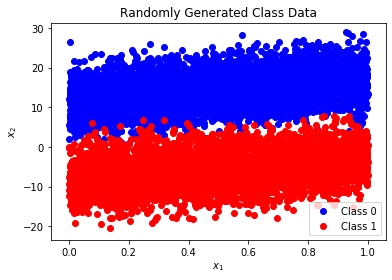

In [36]:
# Hyperparameters
m = 10000
w = 5
b = 2
mu = 10
sigma = 4
# Generates the dataset 
data, labels = get_random_data(w, b, mu, sigma, m)
# Plots the dataset
display_random_data(data, labels)
# Splits dataset into training and testing sets
train_data, test_data, train_labels, test_labels = split_data(data, labels)

#Problem Two: Keras Logistic Regression
_Using the generated dataset, we can now use keras to perform logistic regression on it._

**Additional Imports**

In [0]:
import tensorflow as tf
from tensorflow import keras

This will create a complete logistic model made for the dataset

In [0]:
def keras_create_logistic_model ():
  # Defines the model
  logistic_network = keras.models.Sequential()
  # Adds a single dense layer
  logistic_network.add(keras.layers.Dense(1, activation='sigmoid', input_shape=(2,)))
  # Compiles the network
  logistic_network.compile(optimizer='rmsprop',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])
  return logistic_network

Now we can compile and train this model on the data.

In [39]:
# Hyperparameters
epochs = 100
batch_size = 512

# Creates the network
log_network = keras_create_logistic_model()

# Fits the model
history = log_network.fit(train_data,
                          train_labels,
                          epochs=epochs,
                          batch_size=batch_size,
                          validation_data=(test_data, test_labels))

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 0s 14us/sample - loss: 2.9804 - acc: 0.0922 - val_loss: 2.8643 - val_acc: 0.0965
Epoch 2/100
8000/8000 [==============================] - 0s 4us/sample - loss: 2.7983 - acc: 0.0925 - val_loss: 2.7032 - val_acc: 0.0965
Epoch 3/100
8000/8000 [==============================] - 0s 3us/sample - loss: 2.6416 - acc: 0.0925 - val_loss: 2.5502 - val_acc: 0.0965
Epoch 4/100
8000/8000 [==============================] - 0s 3us/sample - loss: 2.4900 - acc: 0.0931 - val_loss: 2.4005 - val_acc: 0.0970
Epoch 5/100
8000/8000 [==============================] - 0s 3us/sample - loss: 2.3404 - acc: 0.0935 - val_loss: 2.2518 - val_acc: 0.0955
Epoch 6/100
8000/8000 [==============================] - 0s 3us/sample - loss: 2.1915 - acc: 0.0944 - val_loss: 2.1035 - val_acc: 0.0950
Epoch 7/100
8000/8000 [==============================] - 0s 3us/sample - loss: 2.0447 - acc: 0.0948 - val_loss: 1.9587 - val_acc:

This will display the data with a prediction line and the actual separating line.

In [0]:
def display_prediction (data, labels, p_w, p_b, w, b):
  # Reshapes the labels to make for easier comparison
  idx = labels.flatten()
  # Seperate and plot the data according to label
  zero_data = data[idx == 0,:]
  plt.scatter(zero_data[:,0], zero_data[:,1], c='blue', label='True Class 0')
  one_data = data[idx == 1,:]
  plt.scatter(one_data[:,0], one_data[:,1], c='red', label='True Class 1')
  x = np.linspace(0,1,100)
  py = p_w*x+p_b
  plt.plot(x, py, '-g', label='Prediction Line', linewidth = 4.0)
  y = w*x+b
  plt.plot(x, y, '-k', label='Actual Line', linewidth = 4.0)
  # Adds some descriptive elements and shows the plot
  plt.legend()
  plt.title('Predictions on Random Data')
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  plt.show()
  return

To get the predicted $w_p$ and $b_p$ values for the seperating line, we will get the weights $w_1$, $w_2$ and bias term $b_{model}$ of the trained logistic network.

Since we are using the $sigmoid$ function $\sigma(z)$, defined on $\mathbb{R}^2 \rightarrow (0,1)$, as the activation layer, the resulting classes are separated at the line where $\sigma(z)=1/2$.
___
$\sigma(z)=1/2$

$\Longleftrightarrow z=0$

$\Longleftrightarrow w_1x_1+w_2x_2+b_{model}=0$

$\Longleftrightarrow x_2=-(w_1/w_2)x_1-(b_{model}/w_2)$
___
Thus,

$w_p=-(w_1/w_2)$,

$b_p=-(b_{model}/w_2)$

Now, we will get the weights of the network and compute the predicted weight and bias term. These are then used to form a chart of the data and the predicted/real functions.

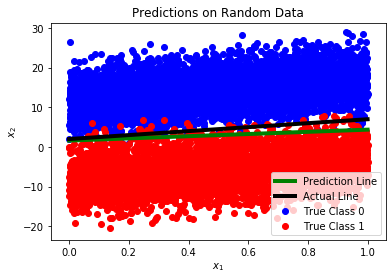

In [41]:
# Gets the weights of the network
weights = log_network.get_weights()
w1 = weights[0][0][0]
w2 = weights[0][1][0]
bias = weights[1][0]
# Calculates the predicted weight and bias term for the separating line
p_w = -w1/w2
p_b = -bias/w2
# Displays the data with the predicted and actual lines
display_prediction(data, labels, p_w, p_b, w, b)

A heat map can then be used to display the output of the model further.

In [0]:
def display_prediction_heatmap (model, p_w, p_b,x_min, x_max, y_min, y_max, acc):
  # Creates X, Y plane
  x = np.linspace(x_min, x_max, acc)
  y = np.linspace(y_min, y_max, acc)
  X, Y = np.meshgrid(x, y)
  # Creates Z values based on x, y grid
  X_flat = X.flatten()
  Y_flat = Y.flatten()
  Z = np.column_stack((X_flat, Y_flat))
  Z = model.predict(Z)
  Z = Z.reshape((acc,acc))

  # Configures the plot
  fig = plt.figure()
  ax = plt.axes()

  # Draws the heatmap
  contours = ax.contourf(X, Y, Z, acc, cmap='RdBu_r')
  im = ax.imshow(Z, extent=[x_min, x_max, y_min, y_max],
                 origin = 'lower', cmap='RdBu_r', alpha=0.5, aspect='auto')
  
  # Gives a colorbar (should be in range [0,1])
  plt.colorbar(im, ax=ax)

  # Gives labels to the chart
  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  ax.set_title("Heatmap Based on Network Predictions")
  plt.show()
  return

This will display the heatmap that corresponds to the network's predictions.

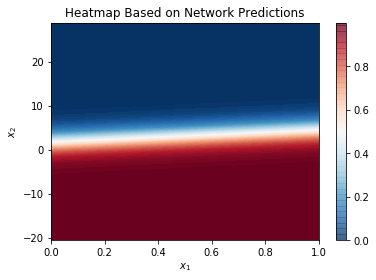

In [43]:
# Creates a heat map of the network
y_min = min(data[:,1])
y_max = max(data[:,1])
accuracy = 100
display_prediction_heatmap(log_network, p_w, p_b, 0, 1, y_min, y_max, accuracy)

#Problem Three: Custom Logistic Regression
_Rather than using keras as a backend of logistic regression, this will be logistic regression done from scratch. In particular, this will use stochastic gradient descent as the backend solution._

In [0]:
class LogRegNetwork:
  weights = None

  # Allows for initialization of hyperparameters and choose a loss function
  def __init__ (self, epochs = 50, loss = 'binary_crossentropy',
                lr = 0.05, verbose = True):
    self.epochs = epochs
    self.loss = loss
    self.lr = lr
    self.verbose = verbose
  
  # Will print out weights if called as a string
  def __str__ (self):
    return self.weights
  
  # This is the activation function (nonlinerarity)
  def __sigmoid (self, z):
    return 1 / (1 + np.exp(-z))
  
  # Loss function for mean squared error
  def _squared_error_loss (self, a, y):
    return (0.5 * (a-y)**2).mean()
  
  # Gradient for mean squared error
  def _squared_error_gradient (self, a, y, data):
    ret = ((a-y)*(1-a)) * data
    # Replaces the bias term with its appropriate gradient
    replace = (a-y) * data
    ret[-1] = replace[-1]
    return np.array([ret]).T

  # Loss function for binary crossentropy
  def _binary_crossentropy_loss (self, a, y):
    return (-y * np.log(a) - (1 - y) * np.log(1 - a)).mean()

  # Binary crossentropy gradient function
  def _binary_crossentropy_gradient (self, a, y, data):
    return np.array([(a-y) * data]).T

  def get_weights (self):
    return self.weights

  # Provides users (and the fit function) to test compatibility of the
  # training and testing data provided.
  def test_dataset (self, tr_d, tr_l, te_d, te_l, re = False):
    # Converts the data into numpy arrays (if not already)
    try:
      trd = np.array(tr_d)
      trl = np.array(tr_l)
      ted = np.array(te_d)
      tel = np.array(te_l)
    except:
      if re:
        raise Exception("Dataset could not be coerced into numpy arrays.")
      return False
    # Tests shape of the training set
    if trd.shape[0] != trl.shape[0]:
      if re:
        raise Exception("Training data and labels are unequal sizes.")
      return False
    # Tests shape of the testing set
    if ted.shape[0] != tel.shape[0]:
      if re:
        raise Exception("Testing data and labels are unequal sizes.")
      return False
    # Tests shape of the training labels
    if trl.shape[1] != 1:
      if re:
        raise Exception('Expected Training Labels to have shape (n,1).'
        'Instead got shape (n,' + str(trl.shape[1]) + ').')
      return False
    # Tests shape of the testing labels
    if tel.shape[1] != 1:
      if re:
        raise Exception('Expected Testing Labels to have shape (n,1).'
        'Instead got shape (n,' + str(tel.shape[1]) + ').')
      return False
    # All preliminary tests of the data are passed
    return True

  def fit (self, tr_d, tr_l, te_d, te_l):
    # Preprocesses Data
    self.test_dataset(tr_d, tr_l, te_d, te_l, re = True)
    tr_d_ = np.array(tr_d)
    trd = np.column_stack((tr_d_, np.ones(shape=(tr_d_.shape[0], 1))))
    trl = np.array(tr_l)
    te_d_ = np.array(te_d)
    ted = np.column_stack((te_d_, np.ones(shape=(te_d_.shape[0], 1))))
    tel = np.array(te_l)
    # Tests that the loss function and gradient exist
    if not ('_' + self.loss + '_loss') in dir(self):
      print('"' + self.loss + '" is not a valid loss function.'
      'Defaulting to "binary_crossentropy".')
      self.loss = 'binary_crossentropy'

    # Sets weights to a zero vector the size of the amount of features
    feature_count = trd.shape[1]
    self.weights = np.zeros(shape=(feature_count,1))

    # Performs Stochastic Gradient Descent
    batch_cnt = trd.shape[0]
    for i in range(self.epochs):
      # Iterates through each batch (sgd has batch size of 1)
      for j in range(batch_cnt):
        z = np.dot(trd[j], self.weights)
        a = self.__sigmoid(z)
        # This is the gradient of the loss function
        grad_function = '_' + self.loss + '_gradient'
        gradient = (1/batch_cnt) * getattr(self, grad_function)(a,trl[j],trd[j])
        self.weights -= self.lr * gradient
        # Will print out current loss of the test set at the end of each epoch
        if self.verbose and j == batch_cnt-1:
          z_test = np.dot(ted, self.weights)
          a_test = self.__sigmoid(z_test)
          # Computes the loss on the testing set
          lssf = '_' + self.loss + '_loss'
          lss = getattr(self, lssf)(a_test, tel)
          # Gets the accuracy of the predictions on the test set
          accuracy = self.accuracy(te_d, te_l)
          # Prints out the results of each epoch
          print('[Epoch {0}]: Loss = {1:.5f}, Accuracy = {2:.2f}%'.
                format(i+1, lss, accuracy * 100))

    # Prints out the final results of the network
    if self.verbose:
      z_test = np.dot(ted, self.weights)
      a_test = self.__sigmoid(z_test)
      # Computes the loss on the testing set
      lssf = '_' + self.loss + '_loss'
      lss = getattr(self, lssf)(a_test, tel)
      # Gets the accuracy of the predictions on the test set
      accuracy = self.accuracy(te_d, te_l)
      # Prints out the results of each epoch
      print('\n---------------------------------------------------------')
      print('[FINAL RESULTS]: Loss = {0:.5f}, Accuracy = {1:.2f}%'.
            format(lss, accuracy * 100))
      print('---------------------------------------------------------')
    
    return

  # Returns a prediction (0 or 1) based on the data inputed
  def predict (self, data):
    # Coerces data into numpy array
    try:
      np_data = np.array(data)
    except:
      raise Exception("Data could not be coerced into a numpy array.")
    # Adds the bias terms to the data
    np_data = np.column_stack((np_data, np.ones(shape=(np_data.shape[0], 1))))
    # Calculates the prediction. Predictions are in range (0,1)
    try:
      return self.__sigmoid(np.dot(np_data, self.weights))
    except:
      raise Exception('Prediction data is of incorrect form. Expected'
      'shape (n,' + str(self.weights.shape[0]-1) + '). Instead got shape'
      '(n,' + str(np_data.shape[1]-1) + ").")
  
  # Returns the accuracy of the network on a testing dataset
  def accuracy (self, te_d, te_l):
    try:
      tel = np.array(te_l)
    except:
      raise Exception("Test labels could not be coerced into numpy arrays.")
    # Predicts the labels of the data. np.rint causes the labels to be
    # discrete predictions; 0 on [0, 0.5] and 1 on (0.5, 1], from testing.
    prl = np.rint(self.predict(te_d))
    # Returns the accuracy of the network on the testing set
    return np.sum(prl == tel) / prl.size

We can initialize the model with the desired epochs, learning rate, loss function and specify whether we want verbose output.
(By default, the network will run for 50 epochs at a 0.05 learning rate, using binary cross entropy and verbose output.)

Fitting the network to the dataset will display the loss and the accuracy on the test set.

In [45]:
#custom_log_network = LogRegNetwork(epochs = epochs, loss = 'squared_error')
custom_log_network = LogRegNetwork(epochs = epochs, lr = 0.1)
custom_log_network.fit(train_data, train_labels, test_data, test_labels)

[Epoch 1]: Loss = 0.21916, Accuracy = 94.90%
[Epoch 2]: Loss = 0.17301, Accuracy = 95.10%
[Epoch 3]: Loss = 0.15418, Accuracy = 95.15%
[Epoch 4]: Loss = 0.14358, Accuracy = 95.20%
[Epoch 5]: Loss = 0.13663, Accuracy = 95.20%
[Epoch 6]: Loss = 0.13165, Accuracy = 95.20%
[Epoch 7]: Loss = 0.12786, Accuracy = 95.20%
[Epoch 8]: Loss = 0.12485, Accuracy = 95.20%
[Epoch 9]: Loss = 0.12237, Accuracy = 95.20%
[Epoch 10]: Loss = 0.12028, Accuracy = 95.20%
[Epoch 11]: Loss = 0.11848, Accuracy = 95.25%
[Epoch 12]: Loss = 0.11690, Accuracy = 95.30%
[Epoch 13]: Loss = 0.11549, Accuracy = 95.30%
[Epoch 14]: Loss = 0.11422, Accuracy = 95.35%
[Epoch 15]: Loss = 0.11306, Accuracy = 95.35%
[Epoch 16]: Loss = 0.11199, Accuracy = 95.35%
[Epoch 17]: Loss = 0.11100, Accuracy = 95.35%
[Epoch 18]: Loss = 0.11007, Accuracy = 95.35%
[Epoch 19]: Loss = 0.10920, Accuracy = 95.35%
[Epoch 20]: Loss = 0.10838, Accuracy = 95.40%
[Epoch 21]: Loss = 0.10759, Accuracy = 95.40%
[Epoch 22]: Loss = 0.10684, Accuracy = 95.4

After fitting the model, we can aquire the weights and compute the predicted function the same way as with the keras model. We can also then display these results using the same charts as above.

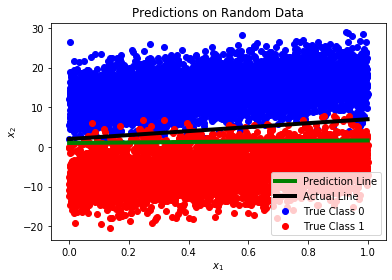

In [46]:
# Gets the weights of the network
weights = custom_log_network.get_weights()
w1 = weights[0,0]
w2 = weights[1,0]
bias = weights[2,0]
# Calculates the predicted weight and bias term for the separating line
p_w = -w1/w2
p_b = -bias/w2
# Displays the data with the predicted and actual lines
display_prediction(data, labels, p_w, p_b, w, b)

Finally, we can observe this output as a heatmap.

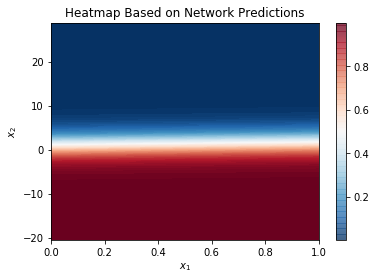

In [47]:
display_prediction_heatmap(custom_log_network, p_w, p_b, 0, 1, y_min, y_max, accuracy)